# <h2 style='text-align: center;'> Project 1 </h2>
<h2 style='text-align: center;'> Accidents in Cologne: A Comprehensive Analysis </h2>

## Contents
1. Introduction
2. Methods
3. Results
4. Conclusion

### 1) Introduction

#### Project Scope
This project embarks on an extensive analysis of traffic-related incidents that occurred within the city of Cologne throughout the calendar years of 2017 and 2018.
#### Focus of the Analysis
This study dives into three main aspects: understanding the types of accidents, how lighting conditions affect incident rates, and the impact of road conditions. Additionally, we'll closely examine the unique characteristics that set apart bicycle accidents from vehicular ones.
#### Project Goal
This project is driven by a dedication to urban safety and preventing accidents strategically. By breaking down statistical patterns systematically, we aim to provide stakeholders with evidence-based insights. The ultimate goal is to contribute to creating a city environment marked by careful planning and improved safety standards.

### 2) Methods

#### Data Sources and Dataset Description:

For this analysis, two datasets were employed, accessible via the following URLs:

2018 Dataset - https://offenedaten-koeln.de/sites/default/files/Unfallstatistik%20K%C3%B6ln%202018.csv

2017 Dataset - https://offenedaten-koeln.de/sites/default/files/Unfallstatistik%20K%C3%B6ln%202017.csv

The datasets contain detailed information on traffic-related incidents in Cologne for the respective years, encompassing variables such as the year of occurrence, month, hour, weekday, accident category, accident type, lighting conditions, involvement of bicycles and cars, and road conditions.


#### Data Engineering Steps:
1) **Combining Datasets:**

*road_accidents = pd.concat([road_accidents_2018, road_accidents_2017])*

Merged the datasets for 2017 and 2018 into a single dataframe for comprehensive analysis.

2) **Dropping Irrelevant Columns:**

*road_accidents.drop(columns=['ID','ULAND','UREGBEZ','UKREIS','UGEMEINDE','LINREFX', 'LINREFY', 'IstFuss', 'UTYP1', 'IstKrad', 'IstGkfz', 'IstSonstige'], inplace=True)*

Removed columns that were deemed irrelevant for the current analysis.

3) **Renaming Columns:**

*road_accidents.rename(columns= {'UJAHR':'Year', 'UMONAT':'Month', 'USTUNDE':'Hour', 'UWOCHENTAG ':'Weekday', 'UKATEGORIE':'Accident_Category', 'UART':'Accident_Type', 'ULICHTVERH':'Lighting_Conditions', 'IstRad': 'Accident_with_bike', 'IstPKW':'Accident_with_car', 'USTRZUSTAND':'Road_Condition'}, inplace=True)*

Standardized column names for clarity and consistency.

4) **Replacing Values with Actual Meaning:**

*mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
road_accidents['Weekday'] = road_accidents['Weekday'].replace(mapping)*

Substituted coded values with meaningful labels for better interpretation.

Similar replacement procedures were conducted for Accident_Category, Accident_Type, Lighting_Conditions, Accident_with_bike, Accident_with_car, and Road_Condition.

5) **Database Connection and Storage:**

*connection = sqlite3.connect('data/dataset.sqlite')
road_accidents.to_sql("road_accidents", connection, if_exists='replace', index=False)*

Established a SQLite database connection and stored the processed dataframes ie. road_accidents as tables within the database for efficient retrieval and analysis.

These steps collectively form a robust methodology for collecting, processing, and storing data for subsequent analysis.

### 3) Results

#### Load all the required Libraries and Data

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [61]:
# Replace 'your_database_file.sqlite' with the actual name of your SQLite file
database_file = 'C:/Users/DELL/Downloads/Dataset.sqlite'

# Establish a connection to the SQLite database
connection = sqlite3.connect(database_file)

# Create a cursor object to interact with the database
cursor = connection.cursor()

#Fetch all rows from table
sql_query = 'SELECT * FROM road_accidents'
road_accidents = pd.read_sql_query(sql_query, connection)

# Remember to close the connection when you're done
connection.close()

In [62]:
road_accidents.head()

,Year,Month,Hour,Weekday,Accident_Category,Accident_Type,Lighting_Conditions,Accident_with_bike,Accident_with_car,Road_Condition
0,2018,1,15,Monday,Accident with slightly injured people,Collision with a moving/stopping/stationary ve...,daylight,Accident without bicycle involvement,Accident with car involvement,Dry
1,2018,1,11,Wednesday,Accident with slightly injured people,Collision with an oncoming vehicle,daylight,Accident without bicycle involvement,Accident with car involvement,Wet/damp/slippery
2,2018,1,4,Monday,Accident with seriously injured people,Departure from the road to the left,darkness,Accident without bicycle involvement,Accident with car involvement,Wet/damp/slippery
3,2018,1,18,Wednesday,Accident with slightly injured people,Collision between a vehicle and a pedestrian,darkness,Accident without bicycle involvement,Accident with car involvement,Wet/damp/slippery
4,2018,1,11,Thursday,Accident with slightly injured people,Collision with a vehicle turning / crossing,daylight,Accident without bicycle involvement,Accident with car involvement,Wet/damp/slippery


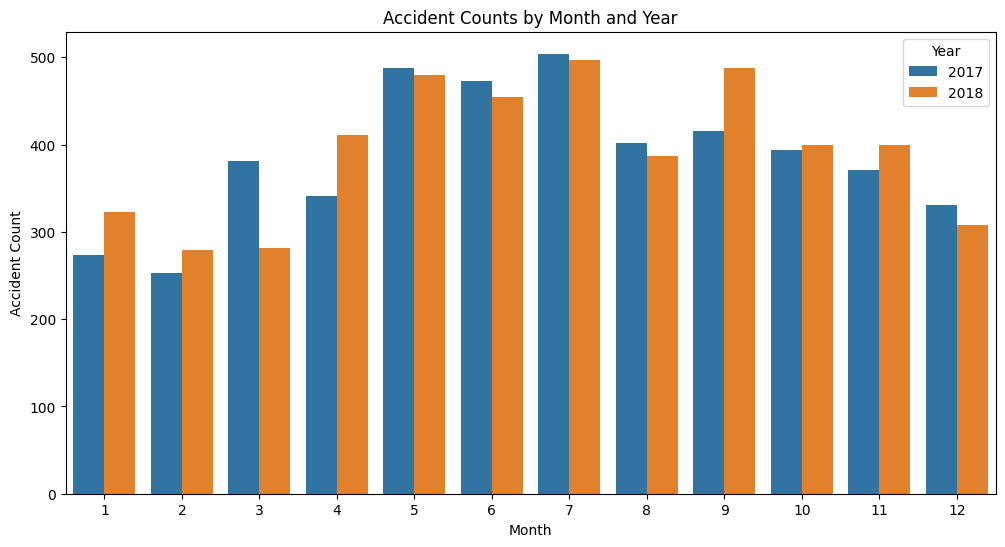

In [56]:
road_accidents['Month'] = road_accidents['Month']
road_accidents['Year'] = road_accidents['Year']

# Bar Chart for Accident Counts by Month and Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Year', data=road_accidents)
plt.title('Accident Counts by Month and Year')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.legend(title='Year')
plt.show()

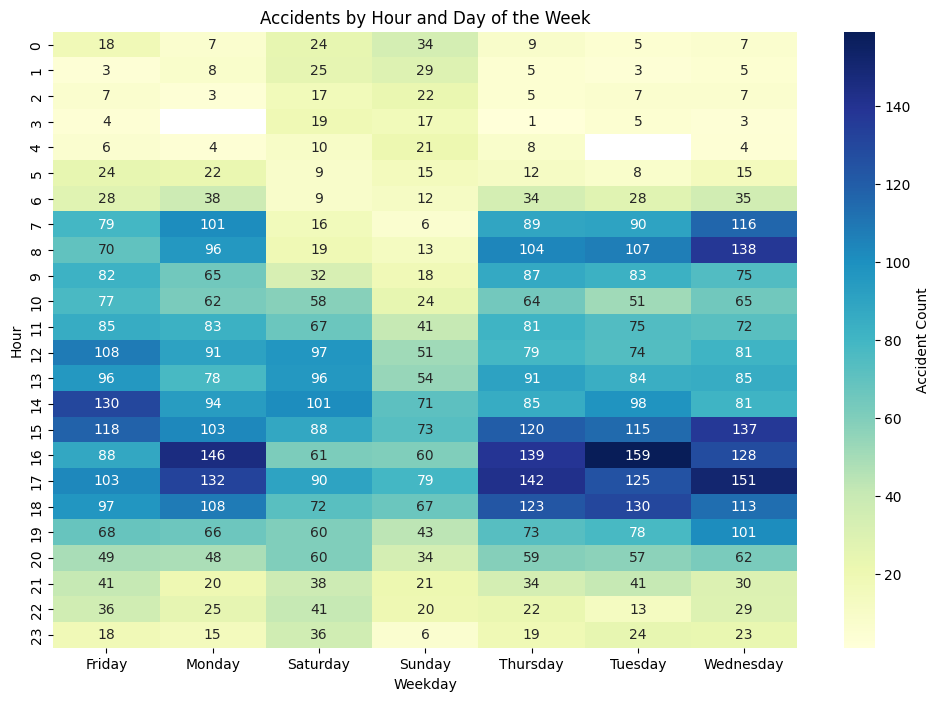

In [66]:
# Heatmap for Accidents by Hour and Day of the Week
accidents_heatmap = road_accidents.groupby(['Hour', 'Weekday']).size().reset_index(name='Accident_Count')
accidents_heatmap = accidents_heatmap.pivot('Hour', 'Weekday', 'Accident_Count')

plt.figure(figsize=(12, 8))
sns.heatmap(accidents_heatmap, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Accident Count'})
plt.title('Accidents by Hour and Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.show()

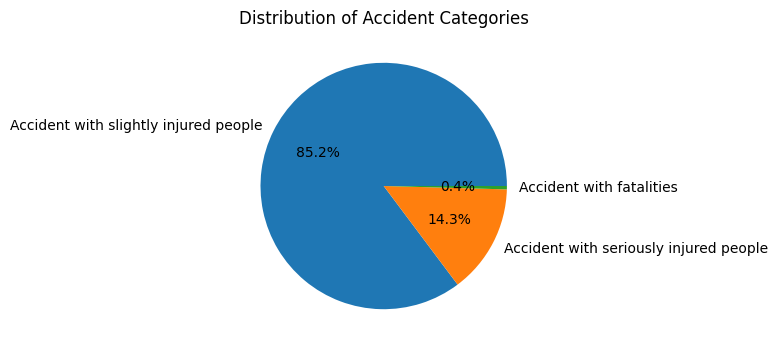

In [70]:
# Pie Chart for Accident Categories
plt.figure(figsize=(4, 4))
road_accidents['Accident_Category'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title('Distribution of Accident Categories')
plt.show()

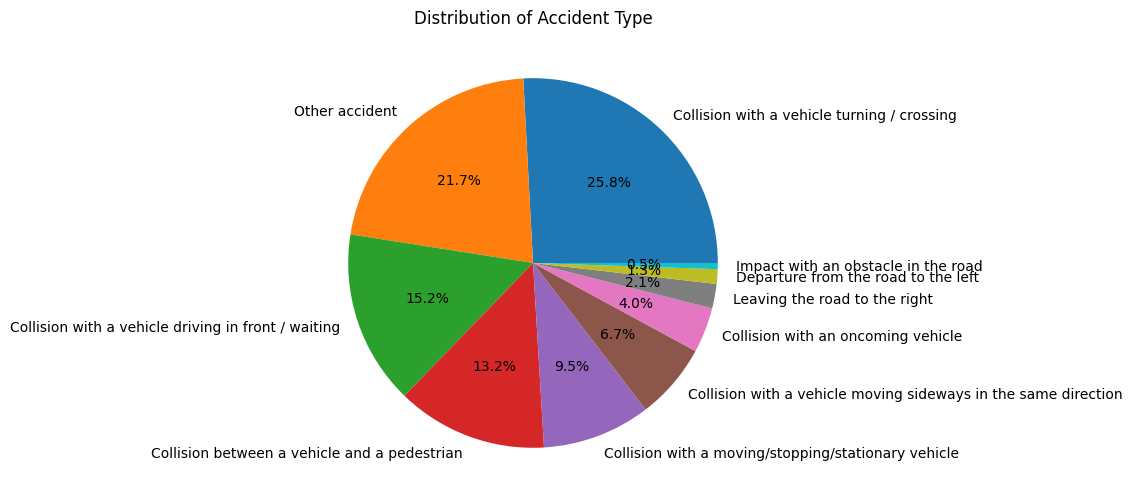

In [65]:
# Pie Chart for Accident Categories
plt.figure(figsize=(6, 6))
road_accidents['Accident_Type'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title('Distribution of Accident Type')
plt.show()

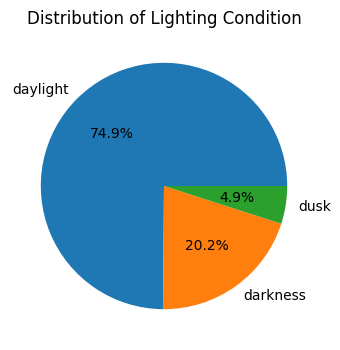

In [69]:
# Pie Chart for Accident Categories
plt.figure(figsize=(4, 4))
road_accidents['Lighting_Conditions'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title('Distribution of Lighting Condition')
plt.show()

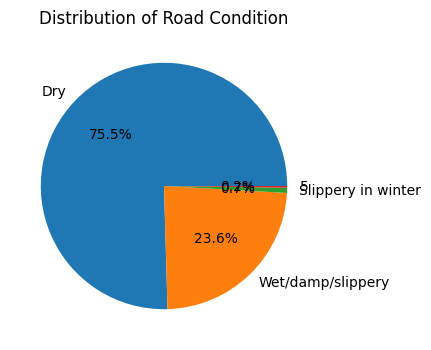

In [68]:
# Pie Chart for Accident Categories
plt.figure(figsize=(4, 4))
road_accidents['Road_Condition'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title('Distribution of Road Condition')
plt.show()

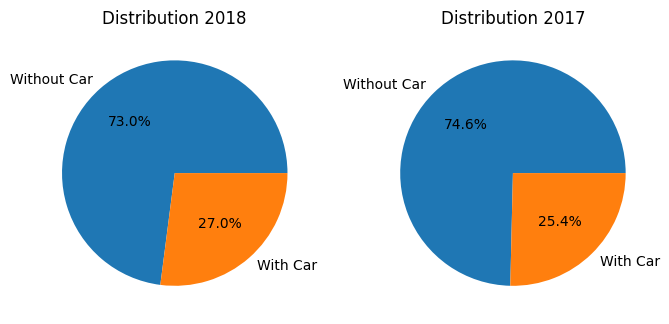

In [52]:
# Create subplots for Pie Charts for each Year for Accidents with Car
years = road_accidents['Year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(8, 5))
for i, year in enumerate(years):
    ax = axes[i]
    data_year = road_accidents[road_accidents['Year'] == year]
    data_year['Accident_with_car'].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', labels=['Without Car', 'With Car'], ylabel='')
    ax.set_title(f'Distribution {year}')
plt.show()

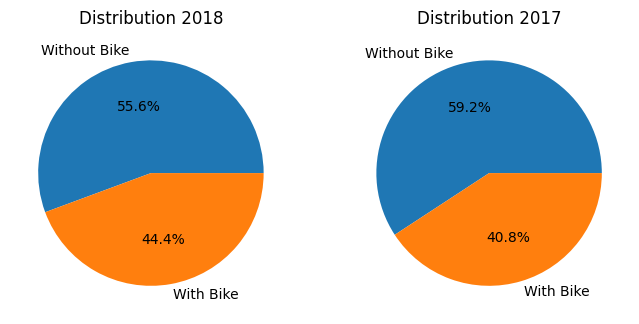

In [53]:
# Create subplots for Pie Charts for each Year for Accidents with bike
years = road_accidents['Year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(8, 5))

for i, year in enumerate(years):
    ax = axes[i]
    data_year = road_accidents[road_accidents['Year'] == year]
    data_year['Accident_with_bike'].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', labels=['Without Bike', 'With Bike'], ylabel='')
    ax.set_title(f'Distribution {year}')
plt.show()

### 4) Conclusion

#### Insights

**1)** *May, June and July has the highest number of accidents in both the year.*

**2)** *Maximum accidents take place between noon 12 till evening 7.*

**3)** *The majority of accidents in Cologne caused slight injuries (7,956), followed by 1,337 incidents resulting in serious injuries, and 41 accidents leading to fatalities.*

**4)** *Collisions with turning or crossing vehicles are the most common accidents in Cologne, with 2,412 cases, followed by other accident types at 2,024 cases.*

**5)** *Daylight conditions witnessed the highest number of accidents in Cologne, totaling 6,989 cases, significantly surpassing accidents during dark (1,883 cases) and dusk (462 cases).*

**6)** *Most accidents in Cologne occurred under dry road conditions (7,043 cases).*

#### Future Work
Incorporating weather data, urban development information, or even socio-economic factors may provide a more holistic understanding. Moreover, expanding the dataset to include a more extended time frame or incorporating real-time data could capture dynamic changes in accident trends and contribute to more robust conclusions.

# <h2 style='text-align: center;'> Project 2 </h2>
<h2 style='text-align: center;'> Bicycle Traffic in Cologne: An increase or decrease in the traffic </h2>

## Contents
1. Introduction
2. Methods
3. Results
4. Conclusion

### 1) Introduction

#### Project Scope
This project explores Cologne's cycling trends using data from 17 counting points, spanning 2009 to 2021. The online platform makes it easy to explore individual points, providing a detailed look at bicycle traffic dynamics in the city.
#### Focus of the Analysis
This analysis looks at how bicycle traffic has changed over the years, using data from 2020 and 2021. We're trying to find out if cycling has increased, decreased, or stayed about the same. The online mapping tool helps us understand these changes more thoroughly.
#### Project Goal
Our main goal is to provide useful information about how bicycle traffic is changing. This information can help with city planning and efforts to create more sustainable and cyclist-friendly environments in Cologne. I want to share data-driven insights with decision-makers, urban planners, and the community.

### 2) Methods

#### Data Sources and Dataset Description:

The primary data sources for this analysis include two datasets from bicycle counting points in Cologne. The datasets were obtained from the following URLs:

2022 Dataset - https://offenedaten-koeln.de/sites/default/files/Radverkehr%20f%C3%BCr%20Offene%20Daten%20K%C3%B6ln%202022.csv

2021 Dataset - https://offenedaten-koeln.de/sites/default/files/Radverkehr%20f%C3%BCr%20Offene%20Daten%20K%C3%B6ln%202021.csv

2020 Dataset - https://offenedaten-koeln.de/sites/default/files/Fahrrad_Zaehlstellen_Koeln_2020.csv

This dataset provides a rich temporal perspective on bicycle traffic dynamics within the city. The counting points offer a comprehensive view, capturing the ebb and flow of cycling activity over the years.


#### Data Engineering Steps:
1) **Renaming Column Names:**

*df_2020.rename(columns= {'Jahr 2020':'Month'}, inplace=True)
df_2021.rename(columns= {'Unnamed: 0':'Month'}, inplace=True)*

Columns were renamed to enhance clarity, with 'Jahr 2020' renamed to 'Month' in the 2020 dataset and 'Unnamed: 0' renamed to 'Month' in the 2021 dataset.

2) **Replacing Column Errors:**

*df_2020.columns = df_2020.columns.str.replace('Ã¼', 'ü')*

Character encoding errors were addressed in column names by replacing characters like 'Ã¼' with 'ü', 'Ã' with 'ß', and 'Ã¤' with 'ä'.

3) **Replacing Row Errors:**

*df_2020.replace({'Ã¼': 'ü', 'Ã ': 'ß', 'Ã¤': 'ä'}, regex=True, inplace=True)*

Row-level character encoding errors were corrected, replacing 'Ã¼' with 'ü', 'Ã ' with 'ß', and 'Ã¤' with 'ä' using regex-based replacements.

4) **Handling NaN Values:**

*df_2021.fillna(0, inplace=True)*

NaN values were replaced with 0 for both 2020 and 2021 datasets to ensure consistency and facilitate downstream analysis.

5) **Dropping Extra Columns:**

*df_2021.drop(columns=['Rodenkirchener Brücke','Severinsbrücke', 'Neusser Straße'], inplace=True)*

Certain columns ('Rodenkirchener Brücke', 'Severinsbrücke', 'Neusser Straße') were dropped from the 2021 dataset to streamline the data for analysis and same for dataset for 2022.

6) **Combining Datasets:**

*bicycle_traffic=pd.concat([df_2022, df_2021, df_2020])*

Both datasets were concatenated into a single dataset named 'bicycle_traffic' to create a unified dataset for comprehensive analysis.

7) **Database Connection and Storage:**

*connection = sqlite3.connect('data/dataset.sqlite')
bicycle_traffic.to_sql("bicycle_traffic", connection, if_exists='replace', index=False)*

Established a SQLite database connection and stored the processed dataframes ie. bicycle_traffic as tables within the database for efficient retrieval and analysis.

These steps collectively form a robust methodology for collecting, processing, and storing data for subsequent analysis.

### 3) Results

#### Load all the required Libraries and Data

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [80]:
# Replace 'your_database_file.sqlite' with the actual name of your SQLite file
database_file = 'C:/Users/DELL/Downloads/Dataset.sqlite'

# Establish a connection to the SQLite database
connection = sqlite3.connect(database_file)

# Create a cursor object to interact with the database
cursor = connection.cursor()

#Fetch all rows from table
sql_query = 'SELECT * FROM bicycle_traffic'
bicycle_traffic = pd.read_sql_query(sql_query, connection)

# Remember to close the connection when you're done
connection.close()

In [82]:
bicycle_traffic.head()

,Month,Deutzer Brücke,Hohenzollernbrücke,Neumarkt,Zülpicher Straße,Bonner Straße,Venloer Straße,Vorgebirgswall,Universitäts-straße,A.-Schütte-Allee,Vorgebirgspark,A.-Silbermann-Weg,Stadtwald,Niederländer Ufer,Year
0,Januar,88.423,52.307,84.708,104.967,63.658,124.574,68.031,110.382,31.190,20.023,56.228,41.373,40.526,2022
1,Februar,83.211,48.554,78.712,91.977,58.148,114.010,67.684,100.106,30.866,19.455,51.551,40.836,38.006,2022
2,März,146.113,79.597,126.461,144.872,82.610,170.757,99.689,143.526,64.291,32.507,86.187,77.093,74.298,2022
3,April,138.641,67.561,117.343,144.233,75.400,159.079,88.120,146.349,57.532,27.845,82.934,81.594,68.547,2022
4,Mai,192.947,94.384,165.976,189.672,97.080,207.376,116.181,201.871,84.456,40.209,115.802,103.532,102.333,2022


In [91]:
bicycle_traffic.columns

Index(['Month', 'Deutzer Brücke', 'Hohenzollernbrücke', 'Neumarkt',
       'Zülpicher Straße', 'Bonner Straße', 'Venloer Straße', 'Vorgebirgswall',
       'Universitäts-straße', 'A.-Schütte-Allee', 'Vorgebirgspark',
       'A.-Silbermann-Weg', 'Stadtwald', 'Niederländer Ufer', 'Year'],
      dtype='object')

In [92]:
bicycle_traffic.shape

(36, 15)

In [87]:
melted_data = pd.melt(bicycle_traffic, id_vars=['Month', 'Year'], var_name='Street_Name', value_name='Bicycle_Traffic')

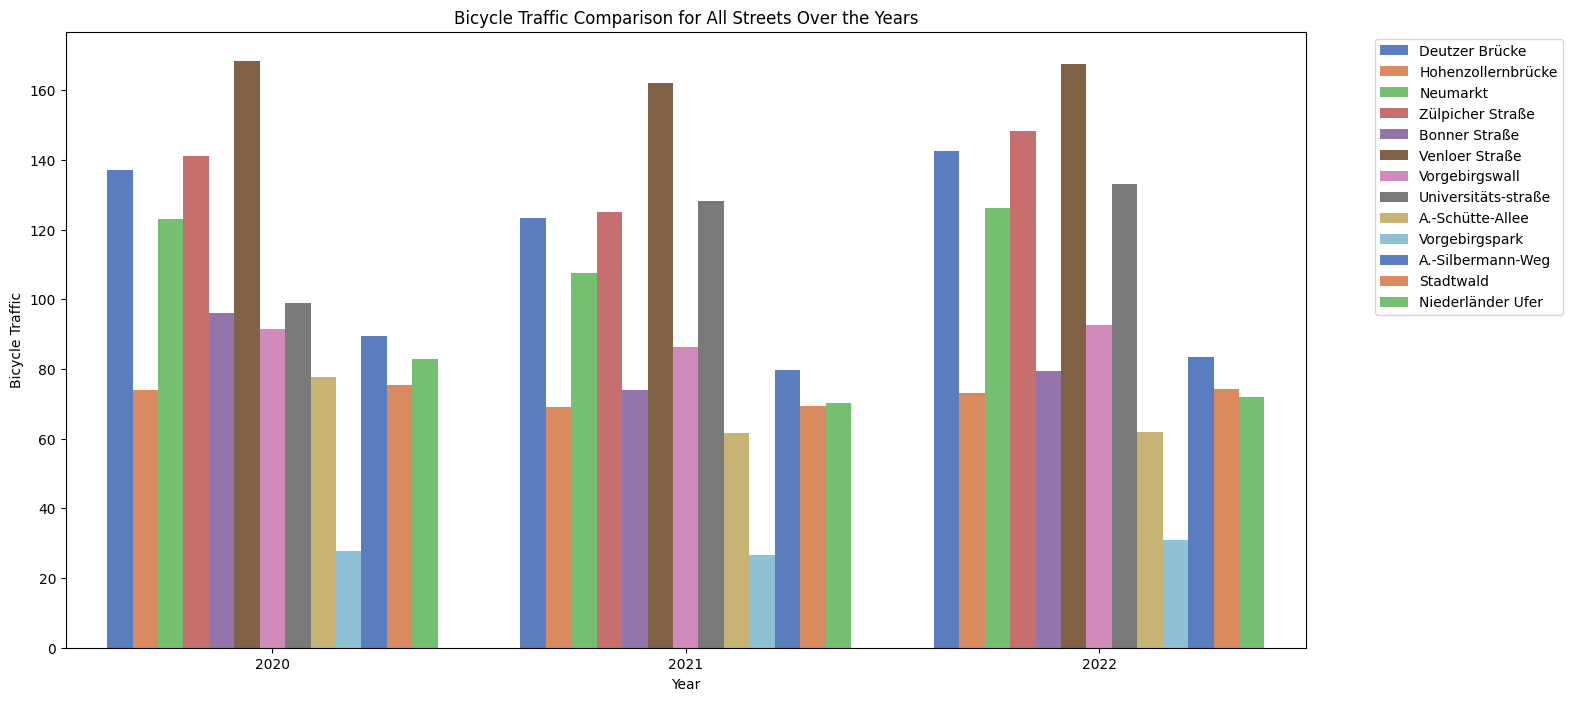

In [100]:
# Define a custom color palette
custom_palette = sns.color_palette("muted", 13)

# Bar Chart: Bicycle Traffic Comparison for All Streets Over the Years with Custom Colors
plt.figure(figsize=(16, 8))
sns.barplot(x='Year', y='Bicycle_Traffic', hue='Street_Name', data=melted_data, ci=None, palette=custom_palette)
plt.title('Bicycle Traffic Comparison for All Streets Over the Years')
plt.xlabel('Year')
plt.ylabel('Bicycle Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

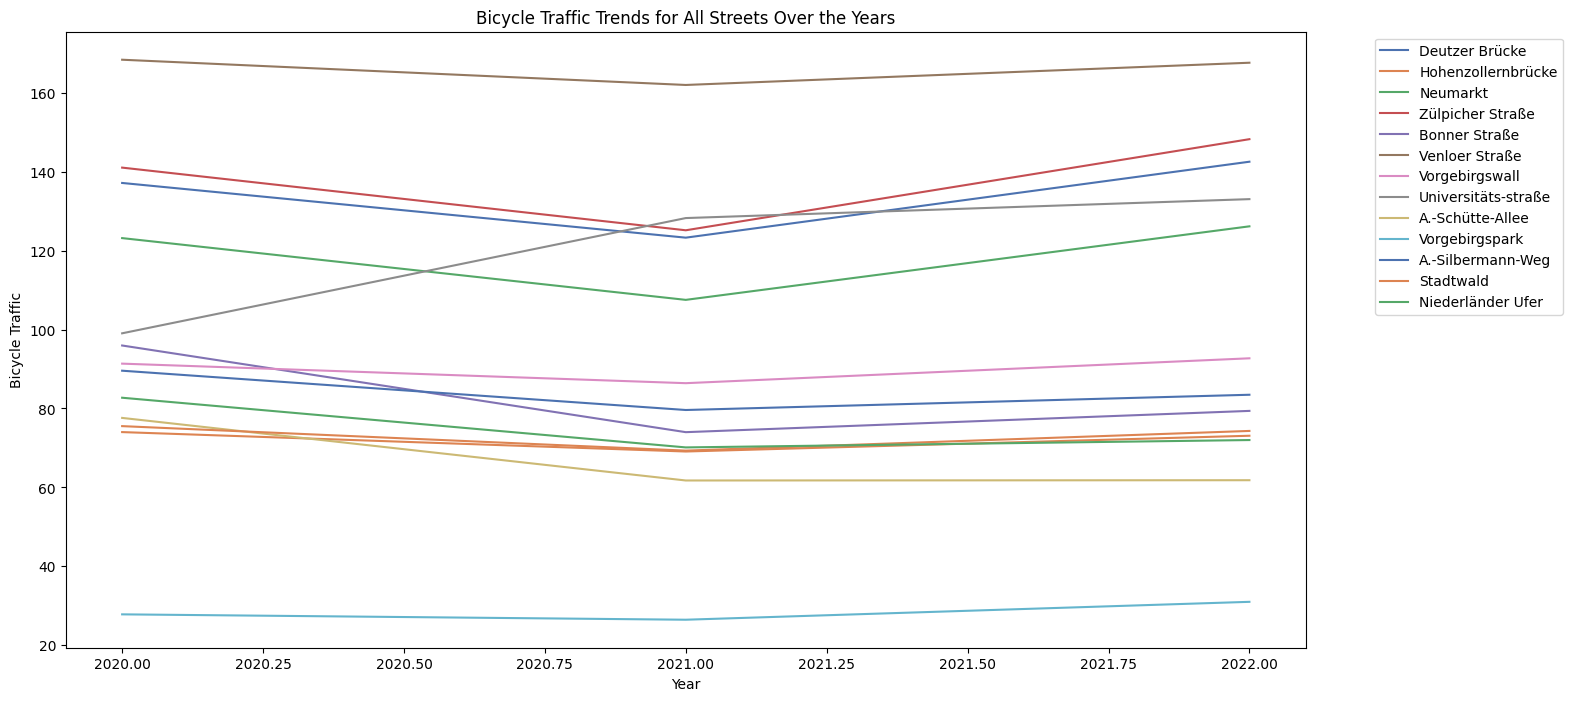

In [107]:
# Line Chart: Bicycle Traffic Trends for All Streets Over the Years
custom_palette = sns.color_palette("deep", 13)

plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Bicycle_Traffic', hue='Street_Name', data=melted_data,ci=None, palette=custom_palette)
plt.title('Bicycle Traffic Trends for All Streets Over the Years')
plt.xlabel('Year')
plt.ylabel('Bicycle Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

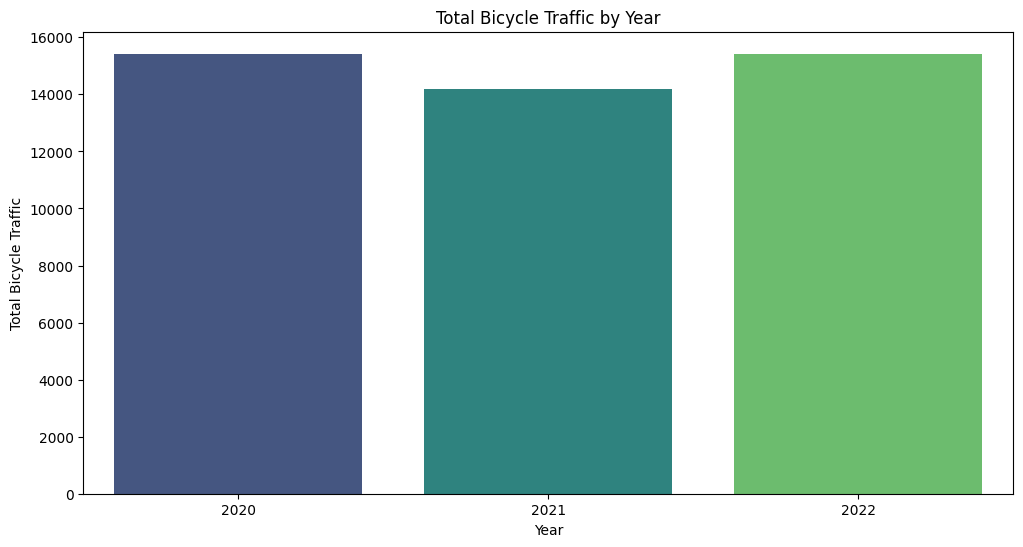

In [106]:
total_traffic_by_year = melted_data.groupby('Year')['Bicycle_Traffic'].sum().reset_index()

# Bar Chart: Total Bicycle Traffic by Year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Bicycle_Traffic', data=total_traffic_by_year, palette='viridis')  # You can choose any palette
plt.title('Total Bicycle Traffic by Year')
plt.xlabel('Year')
plt.ylabel('Total Bicycle Traffic')
plt.show()

### 4) Conclusion

#### Insights

**1)** *In all the years the street with most bikers has been : Venloer Straße*

**2)** *And the street with the least bikers has been : Vorgebirgspark*

**3)** *The majority of accidents in Cologne caused slight injuries (7,956), followed by 1,337 incidents resulting in serious injuries, and 41 accidents leading to fatalities.*

#### Future Work

In the future, this project aims to analyze recent data, uncover seasonal patterns, explore demographic influences, and correlate trends with infrastructure changes. Machine learning models and user surveys will enhance predictive insights and qualitative understanding. Integrating real-time data and enhancing public engagement ensure a comprehensive approach, while ongoing efforts in data quality improvement maintain accuracy and reliability.